<a href="https://colab.research.google.com/github/spmilian/Numerical_B-T-/blob/main/Numerical_B(T).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate as interpolate
from scipy.integrate import quad
from scipy.optimize import curve_fit
############################################
from sklearn import preprocessing
############################################
from numpy.polynomial.polynomial import Polynomial
################################################
###################################################


In [25]:
Temp = np.arange(100, 600, 100) #100*np.arange(1, 6)
BT_nitrogen = np.array([-247, -58.4, -7.5, 15.3, 28.1])
Temp

array([100, 200, 300, 400, 500])

In [26]:
BT_nitrogen

array([-247. ,  -58.4,   -7.5,   15.3,   28.1])

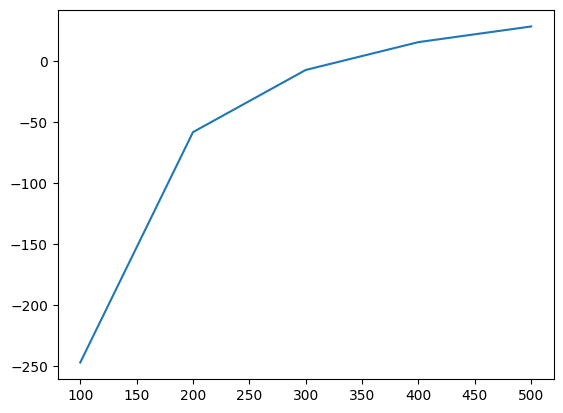

In [27]:
plt.plot(Temp, BT_nitrogen)

\begin{equation}
B(T)\;=\;-2\pi\sigma^3 \mathcal{I},\;\;\texttt{where}\;\; \mathcal{I} \;=\; \int^{\infty}_0 dx x^2\left(e^{{-4u_0 \over  kT} \left[({1\over x})^{12}\ - ({1\over x})^6\right]}-1\right)
\end{equation}

In [19]:
u0_k = 95
sigma = 3.74 #*10**(-10)
u0_k

95

In [18]:
#
def integrand(x, T): #
  exponent = -4*u0_k*((1/x)**12  - (1/x)**6)
  return x**2*(np.exp(exponent/T)-1) #


def expint(T): #
  return quad(integrand, 0, np.inf, args=(T, ))[0]

vec_expint = np.vectorize(expint)



In [23]:
I = vec_expint(np.arange(100, 600, 100)) ##
I


array([ 0.7733281 ,  0.18227195,  0.02252894, -0.04941154, -0.08925261])

In [24]:
BT_numerical = -2*np.pi*(sigma**3)*I
BT_numerical

array([-254.19000219,  -59.91209465,   -7.40517628,   16.24138643,
         29.33699175])

Text(0, 0.5, 'B(T) ($A^3$)')

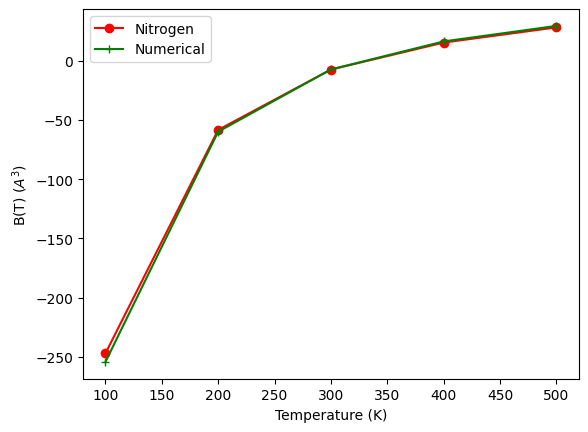

In [33]:
plt.plot(Temp, BT_nitrogen, marker = 'o', color = 'r')
plt.plot(Temp, BT_numerical, marker = '+', color = 'g')
plt.legend(['Nitrogen', 'Numerical'])
plt.xlabel('Temperature (K)')
plt.ylabel('B(T) ($A^3$)')

At low temperatures, the deviation is higher than one...

In [34]:
differences = BT_nitrogen - BT_numerical
differences ##

array([ 7.19000219,  1.51209465, -0.09482372, -0.94138643, -1.23699175])